In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:

# Order by n in site
sites = ['SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'UCLA_CB',
        'Svip1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025',
        'ADHD1',
        'ADHD3',
        'ADHD5',
        'UCLA_DS1']

#p_sex = './results/sex/'
p_sex = '../../results_reviews/sex/model_vars/{}'
p_sex_MLPconn = '../../results_reviews/sex/'
models = ['MLPconn','deeper','shorter','wider','thinner']

In [117]:
# for paper UKBB cap at 50
nsite = {'ABIDEII-BNI_1': 6,
 'ABIDEII-ETH_1': 23,
 'ABIDEII-GU_1': 26,
 'ABIDEII-IP_1': 7,
 'ABIDEII-IU_1': 3,
 'ABIDEII-KKI_1': 17,
 'ABIDEII-NYU_1': 27,
 'ABIDEII-OHSU_1': 27,
 'ABIDEII-OILH_2': 13,
 'ABIDEII-SDSU_1': 21,
 'ABIDEII-SU_2': 7,
 'ABIDEII-TCD_1': 18,
 'ABIDEII-UCD_1': 10,
 'ABIDEII-UCLA_1': 9,
 'ABIDEII-USM_1': 13,
 'ABIDEII-U_MIA_1': 10,
 'ADHD1': 54,
 'ADHD3': 56,
 'ADHD4': 14,
 'ADHD5': 77,
 'ADHD6': 39,
 'Cardiff': 8,
 'HSJ': 39,
 'KKI': 22,
 'LEUVEN_1': 5,
 'MAX_MUN': 11,
 'NYU': 66,
 'OLIN': 8,
 'SDSU': 13,
 'SZ1': 42,
 'SZ10': 9,
 'SZ2': 41,
 'SZ3': 31,
 'SZ4': 25,
 'SZ5': 17,
 'SZ6': 35,
 'SZ7': 14,
 'SZ8': 14,
 'SZ9': 14,
 'Svip1': 48,
 'Svip2': 36,
 'TRINITY': 25,
 'UCLA_1': 24,
 'UCLA_2': 5,
 'UCLA_CB': 43,
 'UCLA_DS1': 94,
 'UCLA_DS2': 19,
 'UKBB11025': 50,
 'UKBB11026': 50,
 'UKBB11027': 50,
 'UM_1': 10,
 'USM': 30,
 'YALE': 15}

# Load Data

In [118]:
# Single Task
baseline_models = {}
for model in models:
    st_data = []
    for site in sites:
        folds = []
        for fold in range(5):
            if model == 'MLPconn':
                p_parent = os.path.join(p_sex_MLPconn, f"{site}/fold_{fold}")
            else:
                p_parent = os.path.join(p_sex.format(model), f"{site}/fold_{fold}")
            file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
            folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
        st_data.append(folds)

    st_data = dict(zip(sites,st_data))
    baseline_models[model] = st_data

In [119]:
# Multi-task
mtl_models = {}
for model in models:
    mtl_data = []
    for fold in range(5):
        if model == 'MLPconn':
            p_parent = os.path.join(p_sex_MLPconn, f"all/fold_{fold}")
        else:
            p_parent = os.path.join(p_sex.format(model), f"all/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))
    
    mtl_models[model] = mtl_data


# Get Scores

In [120]:
# Single Task
baseline_models_acc = {}
for model in models:
    st_acc = []
    st_f1 = []
    st_auc = []
    for site in sites:
        # Accuracy
        st_acc.append([baseline_models[model][site][fold]['Accuracy/test'].iloc[-1] for fold in range(5)])

        # F1
        st_f1.append([baseline_models[model][site][fold]['F1/test'].iloc[-1] for fold in range(5)])

        # AUC
        st_auc.append([baseline_models[model][site][fold]['AUC/test'].iloc[-1] for fold in range(5)])

    st_acc = pd.DataFrame(st_acc,index=sites)
    st_acc_std = st_acc.std(axis=1)
    st_acc_mean = st_acc.mean(axis=1)

    st_f1 = pd.DataFrame(st_f1,index=sites)
    st_f1_std = st_f1.std(axis=1)
    st_f1_mean = st_f1.mean(axis=1)

    st_auc = pd.DataFrame(st_auc,index=sites)
    st_auc_std = st_auc.std(axis=1)
    st_auc_mean = st_auc.mean(axis=1)

    baseline_models_acc[model] = st_acc_mean
    # TODO collect other scores

In [121]:
df_base_acc = pd.DataFrame(baseline_models_acc)
df_base_acc['type'] = 'baseline'
df_base_acc

,MLPconn,deeper,shorter,wider,thinner,type
SZ3,61.904762,65.238095,65.238095,61.904762,65.238095,baseline
SZ6,62.857143,68.571429,62.857143,65.714286,62.857143,baseline
Svip2,61.071429,61.071429,58.214286,61.071429,61.071429,baseline
ADHD6,48.928571,48.928571,51.428571,48.928571,51.428571,baseline
HSJ,41.428571,46.428571,43.928571,43.928571,43.928571,baseline
UCLA_CB,50.555556,48.333333,50.555556,50.555556,50.555556,baseline
Svip1,56.000000,52.000000,58.222222,54.000000,54.000000,baseline
UKBB11026,80.000000,68.000000,74.000000,74.000000,80.000000,baseline
UKBB11027,74.000000,72.000000,70.000000,68.000000,70.000000,baseline
UKBB11025,62.000000,62.000000,62.000000,60.000000,58.000000,baseline


In [122]:
# Multi-task
mtl_models_acc = {}
for model in models:
    mtl_acc = []
    mtl_f1 = []
    mtl_auc = []
    for fold in range(5):
        df = mtl_models[model][fold].transpose().reset_index()
        
        # Accuracy
        mtl_acc.append(df[df['level_1']=='Accuracy/test'].set_index('level_0')[99])

        # F1
        mtl_f1.append(df[df['level_1']=='F1/test'].set_index('level_0')[99])

        # AUC
        mtl_auc.append(df[df['level_1']=='AUC/test'].set_index('level_0')[99])
        
    mtl_acc = pd.concat(mtl_acc,axis=1)
    mtl_acc_std = mtl_acc.std(axis=1)
    mtl_acc_mean = mtl_acc.mean(axis=1)

    mtl_f1 = pd.concat(mtl_f1,axis=1)
    mtl_f1_std = mtl_f1.std(axis=1)
    mtl_f1_mean = mtl_f1.mean(axis=1)

    mtl_auc = pd.concat(mtl_auc,axis=1)
    mtl_auc_std = mtl_auc.std(axis=1)
    mtl_auc_mean = mtl_auc.mean(axis=1)

    mtl_models_acc[model] = mtl_acc_mean
    #TODO collect other scores

In [123]:
df_mtl_acc = pd.DataFrame(mtl_models_acc)
df_mtl_acc['type'] = 'mtl'
df_mtl_acc

,MLPconn,deeper,shorter,wider,thinner,type
level_0,,,,,,
ADHD1,72.545455,74.181818,63.272727,74.363636,67.090909,mtl
ADHD3,46.515152,44.393939,50.151515,55.454545,48.181818,mtl
ADHD5,59.583333,62.416667,59.833333,59.583333,55.833333,mtl
ADHD6,51.428571,54.285714,48.214286,48.214286,56.428571,mtl
HSJ,48.571429,58.571429,46.785714,53.214286,61.071429,mtl
SZ3,68.571429,78.095238,71.904762,81.904762,70.952381,mtl
SZ6,71.428571,68.571429,65.714286,65.714286,60.000000,mtl
Svip1,60.222222,57.777778,60.000000,51.777778,51.777778,mtl
Svip2,50.000000,50.000000,58.571429,60.714286,68.928571,mtl


In [124]:
df_master = pd.concat([df_mtl_acc,df_base_acc])
df_master

,MLPconn,deeper,shorter,wider,thinner,type
ADHD1,72.545455,74.181818,63.272727,74.363636,67.090909,mtl
ADHD3,46.515152,44.393939,50.151515,55.454545,48.181818,mtl
ADHD5,59.583333,62.416667,59.833333,59.583333,55.833333,mtl
ADHD6,51.428571,54.285714,48.214286,48.214286,56.428571,mtl
HSJ,48.571429,58.571429,46.785714,53.214286,61.071429,mtl
SZ3,68.571429,78.095238,71.904762,81.904762,70.952381,mtl
SZ6,71.428571,68.571429,65.714286,65.714286,60.000000,mtl
Svip1,60.222222,57.777778,60.000000,51.777778,51.777778,mtl
Svip2,50.000000,50.000000,58.571429,60.714286,68.928571,mtl
UCLA_CB,53.888889,57.777778,53.333333,50.555556,60.555556,mtl


# Tables

In [125]:
for model in models:
    print(model)
    print(mtl_models_acc[model].mean())
    print(baseline_models_acc[model].mean())
    print()

MLPconn
62.36805080884028
59.9349618635333

deeper
63.390257299091886
59.762706278683716

shorter
61.94094272477731
59.906565656565654

wider
63.651606017207506
59.769397791014335

thinner
62.80880502121103
59.9210729746444



# Plots

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_36504/3628260872.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_36504/3628260872.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_36504/3628260872.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_36504/3628260872.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_36504/3628260872.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['MTL','ST'])


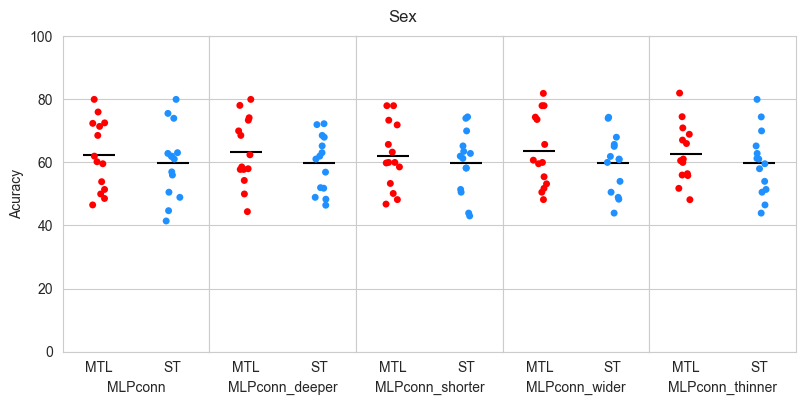

In [133]:
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']
colors = ['red','dodgerblue']
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,5,figsize=(8,4),sharey=True)
for i, model in enumerate(models):
    sns.stripplot(data=df_master, x='type',y=model,hue='type',ax=ax[i],legend=False,palette=colors)
    ax[i].scatter('mtl',df_master[df_master['type']=='mtl'][model].mean(),color='black',marker='_',sizes=[500])
    ax[i].scatter('baseline',df_master[df_master['type']=='baseline'][model].mean(),color='black',marker='_',sizes=[500])
    ax[i].set_xticklabels(['MTL','ST'])
    if model == 'MLPconn':
        ax[i].set_xlabel(f"MLPconn")
    else:
        ax[i].set_xlabel(f"MLPconn_{model}")
    ax[i].set_xlim(-0.5,1.5)
ax[0].set_ylabel('Acuracy')

plt.suptitle ('Sex')
plt.ylim(0,100)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/sex_model_vars.png'),dpi=300)